# Problem Statement
We have a client who has a website where people write different reviews for technical 
products. Now they are adding a new feature to their website i.e. The reviewer will have to 
add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options 
available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the 
reviews which were written in the past and they don’t have a rating. So, we have to build an 
application which can predict the rating by seeing the review.

# Data
The entire data is scrapped from multiple e-commerce websites  
* It has five target class(multi-class classification problem)


In [101]:
#Getting tools ready
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
import nltk
from word2number import w2n
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import token
import re
import string
import unidecode
from wordcloud import WordCloud
from bs4 import BeautifulSoup as bs

In [102]:
df1 = pd.read_csv('Ratings_Prediction.csv')
df2 = pd.read_csv('Ratings_Prediction_Amazon.csv')

In [103]:
df1.head()

,Unnamed: 0,Ratings,Full_review
0,0,4.5,An affordable beast ! Pros: 1. Incredible perf...
1,1,★,To be honest Pro's 1) RGB keyboard 2)144Hzs wi...
2,2,5,Best laptop in this price segment.. battery is...
3,3,4,"This laptop is a beast, and a steal for your m..."
4,4,5,The Laptop is a masterpiece with stunnig desig...


In [104]:
df2.head()

,Unnamed: 0,Ratings,Full_review
0,0,4.0,This is got to be best ultrabook which is pric...
1,1,4.0,Amazing spects under 60k but complete details ...
2,2,1.0,If graphic processor detail mentioned that sho...
3,3,1.0,Read the update at the end.\nMy review:-\nGot...
4,4,5.0,Worth Every Penny.\nThis laptop is amazing.\n...


In [105]:
df1.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   15000 non-null  int64 
 1   Ratings      15000 non-null  object
 2   Full_review  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


In [106]:
df1.drop(df1[df1['Ratings'] == '★'].index, inplace = True)

In [107]:
df1['Ratings'] = df1['Ratings'].astype('float')

In [108]:
df1['Ratings'] = round(df1['Ratings'])

In [109]:
df = df1.append(df2)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31991 entries, 0 to 18263
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   31991 non-null  int64  
 1   Ratings      31991 non-null  float64
 2   Full_review  31896 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 999.7+ KB


In [111]:
df.Ratings.value_counts()

5.0    14785
4.0     6725
1.0     6507
3.0     2509
2.0     1465
Name: Ratings, dtype: int64

In [112]:
df.drop_duplicates(subset = 'Full_review', inplace = True)

In [113]:
df.Ratings.value_counts()

5.0    8233
4.0    4021
1.0    3241
3.0    1361
2.0     748
Name: Ratings, dtype: int64

In [114]:
df.dropna(inplace = True)

In [116]:
#visualizing the count of words in each row
df['word_count'] = [len(word.split()) for word in df['Full_review']]

In [117]:
df.head()

,Unnamed: 0,Ratings,Full_review,word_count
0,0,4.0,An affordable beast ! Pros: 1. Incredible perf...,85
2,2,5.0,Best laptop in this price segment.. battery is...,82
3,3,4.0,"This laptop is a beast, and a steal for your m...",94
4,4,5.0,The Laptop is a masterpiece with stunnig desig...,63
5,5,5.0,So i wanted a decent Gaming Laptop with Good s...,98


# Visualization

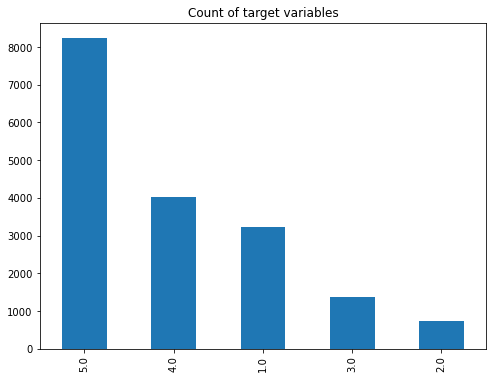

In [118]:
plt.figure(figsize = (8,6))
df['Ratings'].value_counts().plot(kind = 'bar')
plt.title('Count of target variables');

* Data is imbalanced

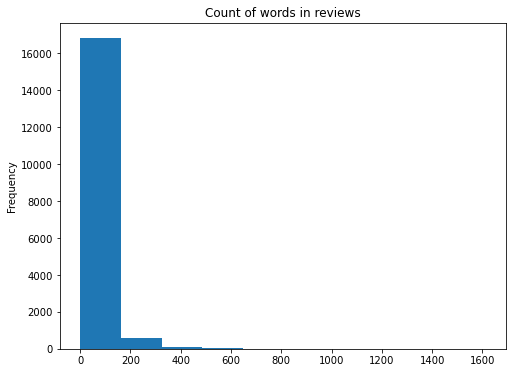

In [119]:
plt.figure(figsize = (8,6))
df['word_count'].plot.hist()
plt.title('Count of words in reviews');

## Before cleaning words visualization

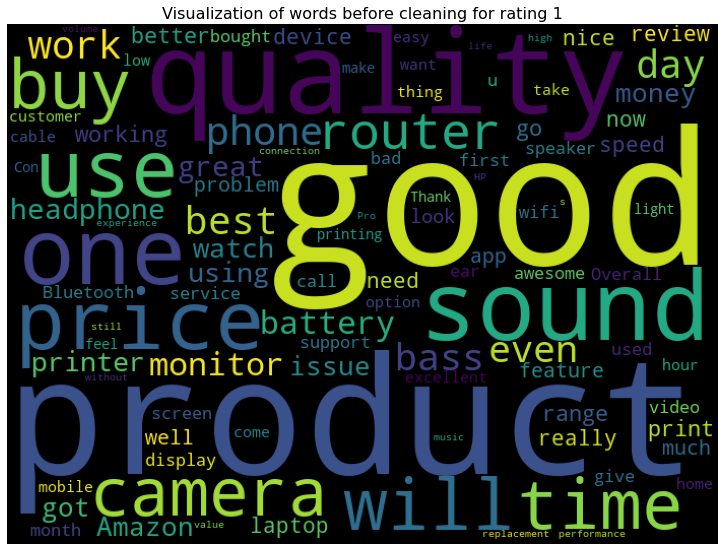

In [120]:
rat1 = df['Full_review'][df['Ratings'] == 1]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat1))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

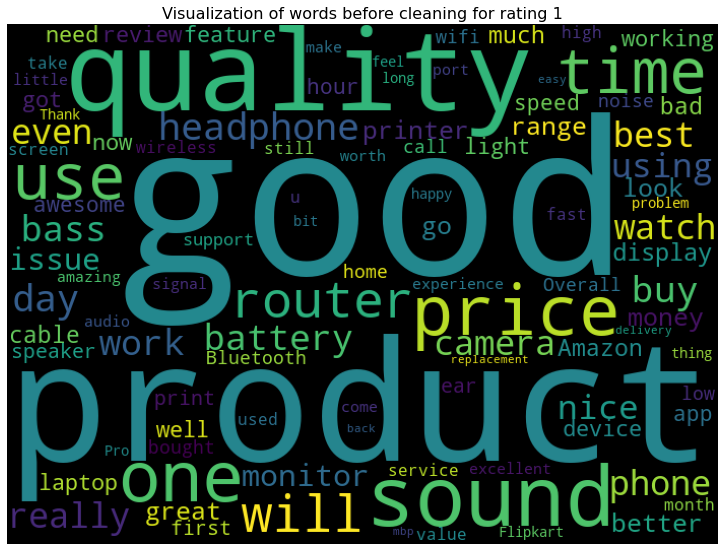

In [121]:
rat2 = df['Full_review'][df['Ratings'] == 2]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat2))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

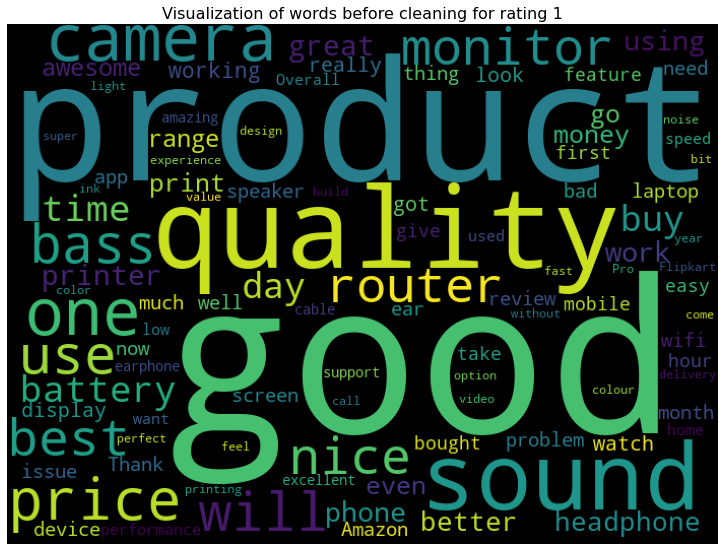

In [122]:
rat3 = df['Full_review'][df['Ratings'] == 3]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat3))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

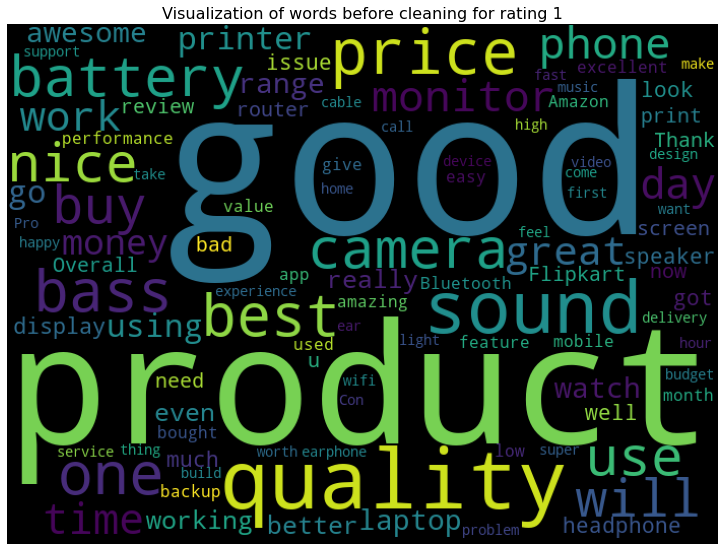

In [123]:
rat4 = df['Full_review'][df['Ratings'] == 4]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat4))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

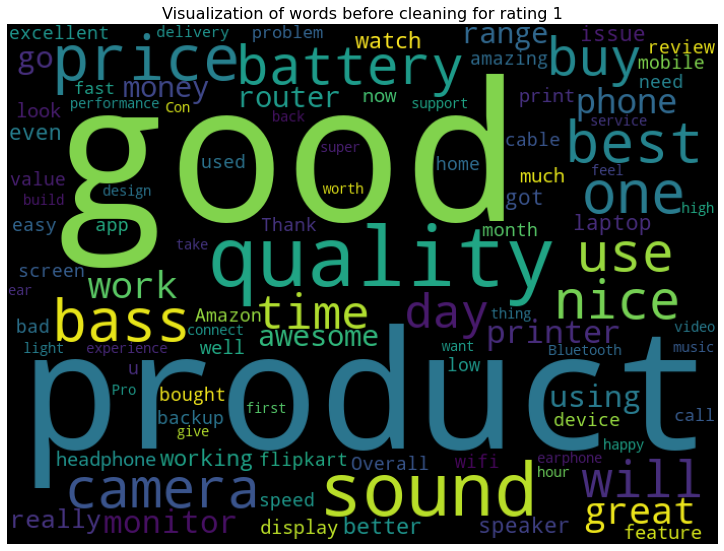

In [124]:
rat5 = df['Full_review'][df['Ratings'] == 5]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat5))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

# preprocessing text

In [125]:
#removing html tags
def remove_html_tags(data):
    soup = bs(data, 'html.parser')
    stripped = soup.get_text(separator = '')
    return stripped

In [126]:
#converting accented words
def convert_acc_words(data):
    text = unidecode.unidecode(data)
    return text

In [127]:
#removing stopwords
def remove_stop_words(data):
    stp_words = stopwords.words('english')
    text = data.apply(lambda x : ' '.join(word for word in x.split() if word not in stp_words))
    return text

In [128]:
#removing words less then 2 in length
def remove_small_words(data):
    data = re.sub(r'\b\w{,2}\b', '', data)
    return data

In [129]:
#removing special characters ,numbers, removes trailing spaces and converts to lower case
def remove_punc(data):
    data = data.str.replace(r'[0-9]', ' ')
    data = data.str.lower()
    data = data.str.replace(r'[^a-zA-z]', ' ')
    data = data.apply(lambda x: " ".join(word for word in x.split()))
    return data

In [137]:
#lemmatizing the data
def lemmatize(data):
    lemmatizer = WordNetLemmatizer()
    data = data.apply(lambda x : ' '.join(lemmatizer.lemmatize(word) for word in x.split()))
    return data

In [131]:
df['Full_review'] = df['Full_review'].apply(remove_html_tags)

In [132]:
df['Full_review'] = df['Full_review'].apply(convert_acc_words)

In [133]:
df['Full_review'] = remove_stop_words(df['Full_review'])

In [134]:
df['Full_review'] = df['Full_review'].apply(remove_small_words)

In [135]:
df['Full_review'] = remove_punc(df['Full_review'])

In [138]:
df['Full_review'] = lemmatize(df['Full_review'])

In [139]:
df['Full_review'][1]

'amazing spects k complete detail must mentioned like ssd type mhz ram graphic detail keyboard type power adapter watt'

In [141]:
df['cleaned_length'] = [len(word.split()) for word in df['Full_review']]

## Visualizing after cleaning data

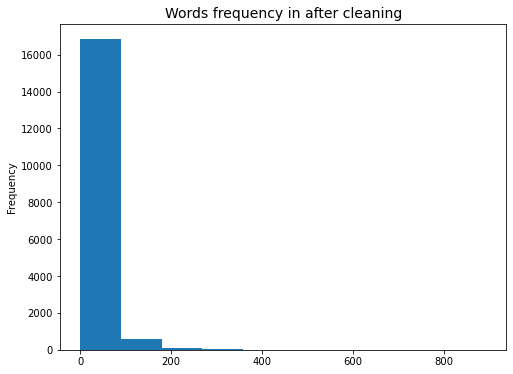

In [143]:
plt.figure(figsize = (8,6))
df['cleaned_length'].plot.hist()
plt.title('Words frequency in after cleaning', fontsize = 14);

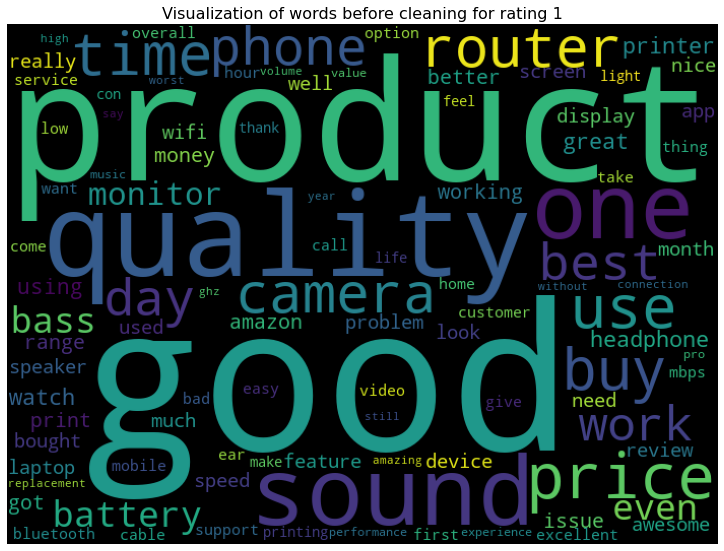

In [144]:
rat1 = df['Full_review'][df['Ratings'] == 1]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat1))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 1', fontsize = 16)
plt.tight_layout()
plt.axis('off');

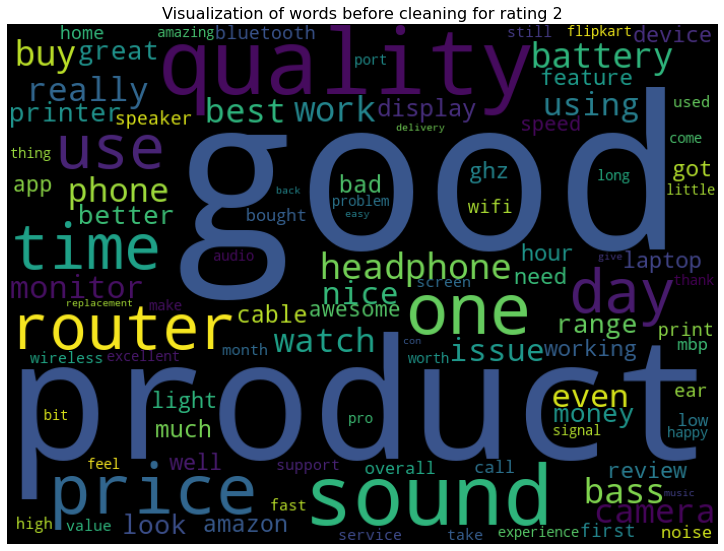

In [145]:
rat2 = df['Full_review'][df['Ratings'] == 2]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat2))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 2', fontsize = 16)
plt.tight_layout()
plt.axis('off');

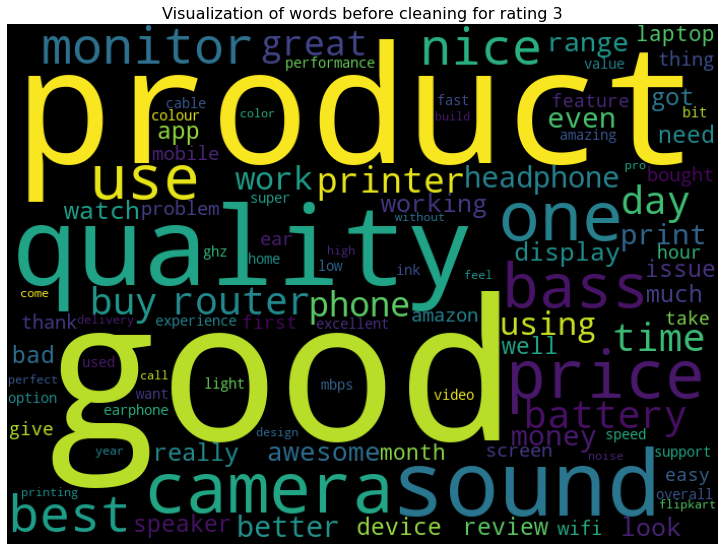

In [146]:
rat3 = df['Full_review'][df['Ratings'] == 3]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat3))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 3', fontsize = 16)
plt.tight_layout()
plt.axis('off');

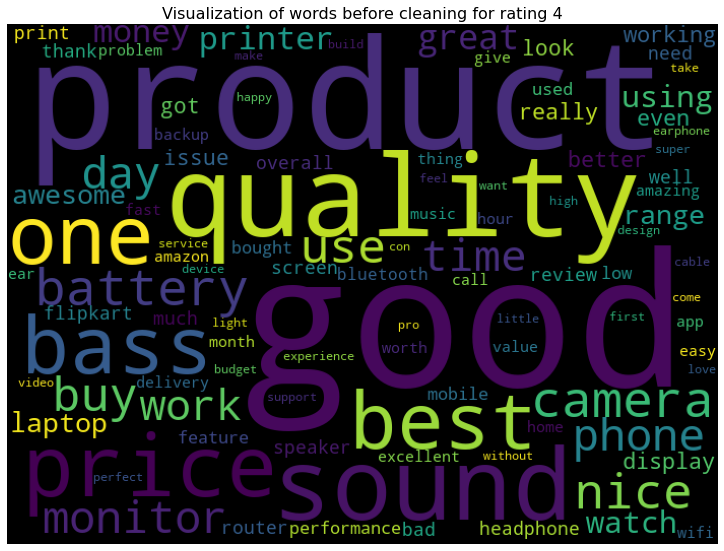

In [147]:
rat4 = df['Full_review'][df['Ratings'] == 4]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat4
                                                                                                                          ))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 4', fontsize = 16)
plt.tight_layout()
plt.axis('off');

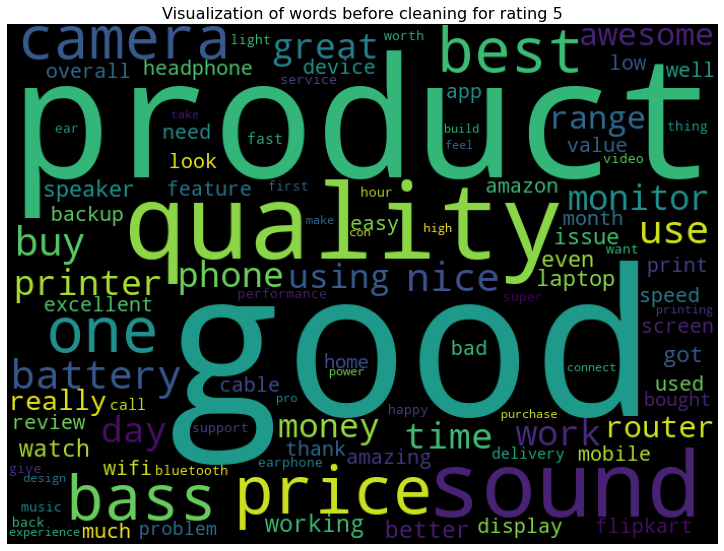

In [148]:
rat5 = df['Full_review'][df['Ratings'] == 5]
news = WordCloud(width = 700, height = 512, max_words = 100, prefer_horizontal=1, collocations= False, ).generate(' '.join(rat5))
plt.figure(figsize = (15,8))
plt.imshow(news)
plt.title('Visualization of words before cleaning for rating 5', fontsize = 16)
plt.tight_layout()
plt.axis('off');

In [149]:
df.isna().sum()

Unnamed: 0        0
Ratings           0
Full_review       0
word_count        0
cleaned_length    0
dtype: int64

In [150]:
df.to_csv('final.csv', index = False)